In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')



In [7]:
df=pd.read_csv('data/Crop_recommendation.csv')
x = df.iloc[ : , : -1].values
y = df.iloc[: , -1].values

In [9]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [17]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: xlabel='N', ylabel='P'>

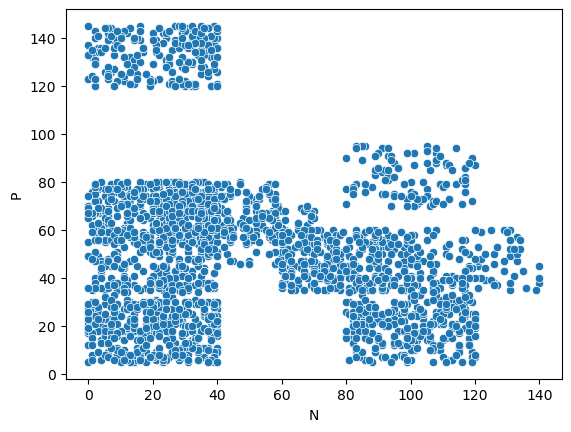

In [19]:
sb.scatterplot(x='N',y='P',data=df)

<Axes: xlabel='label', ylabel='N'>

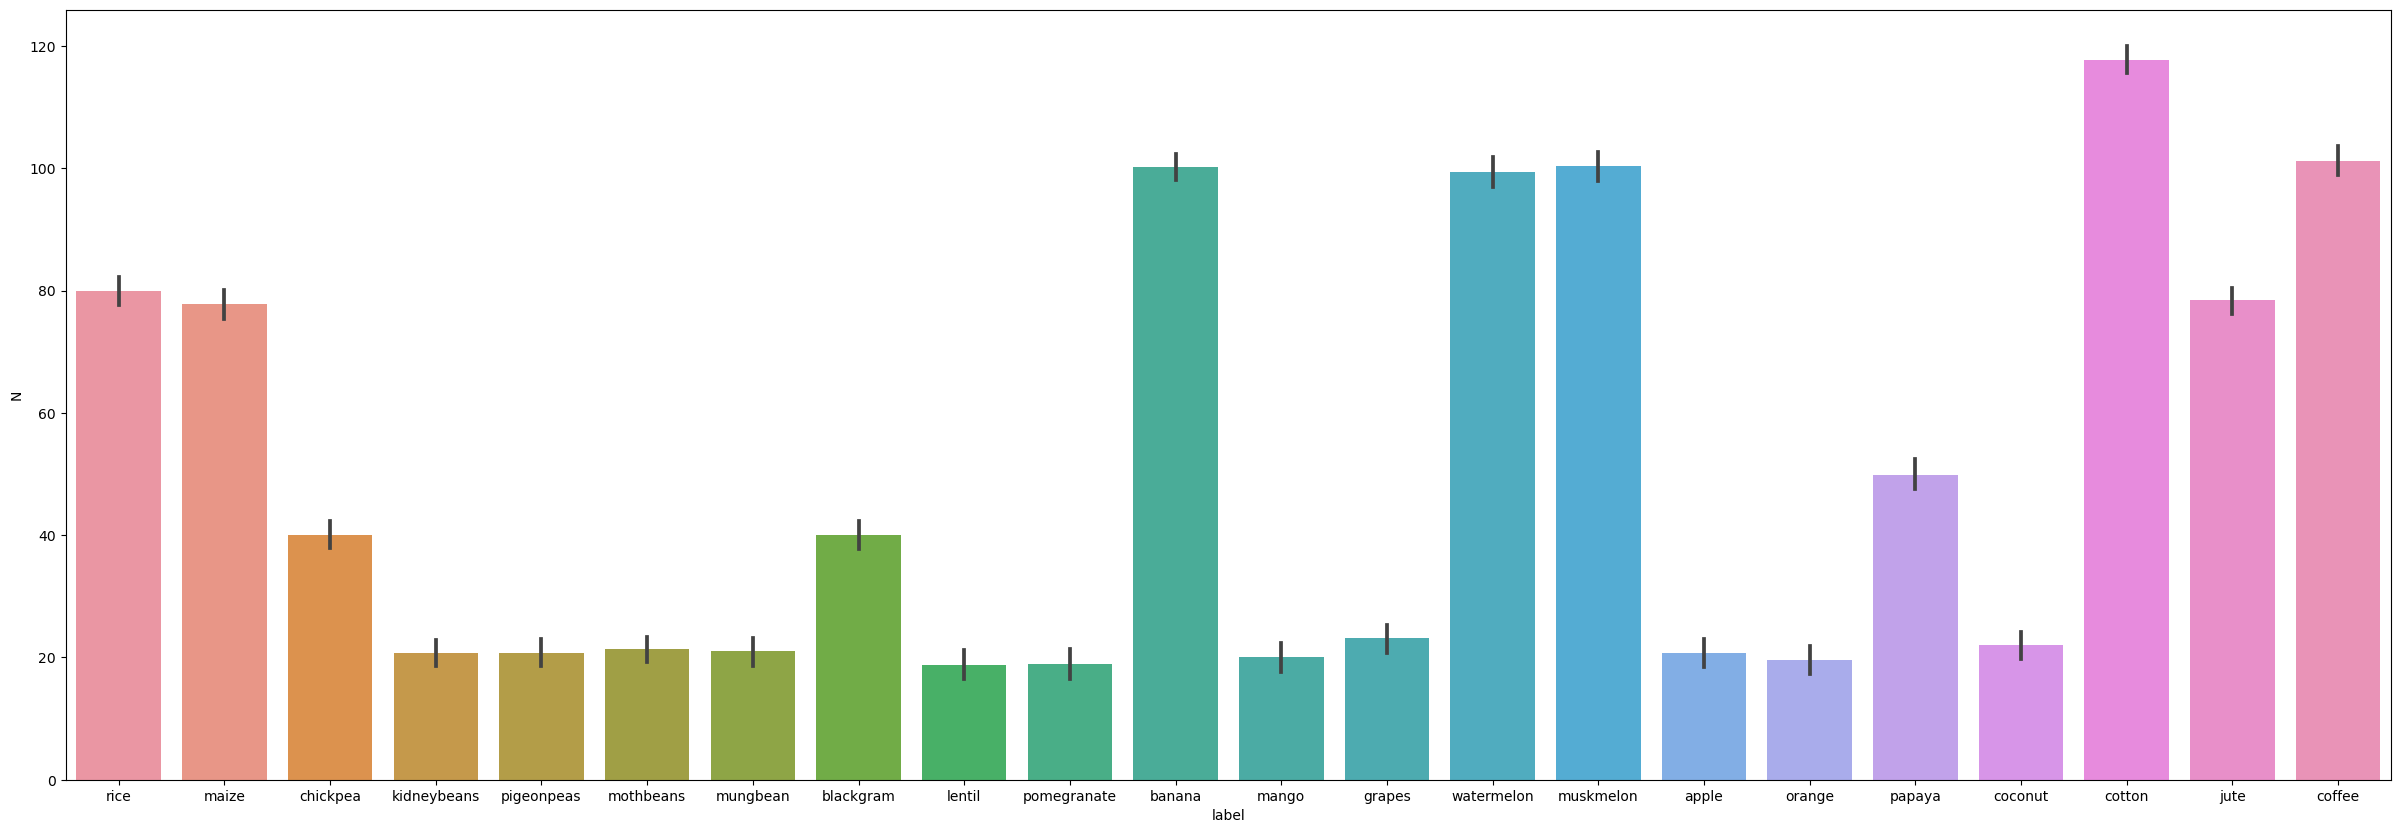

In [21]:
plt.figure(figsize=(30,10))
# sb.heatmap(df.corr(),annot=True)
sb.barplot(x='label',y='N',data=df)

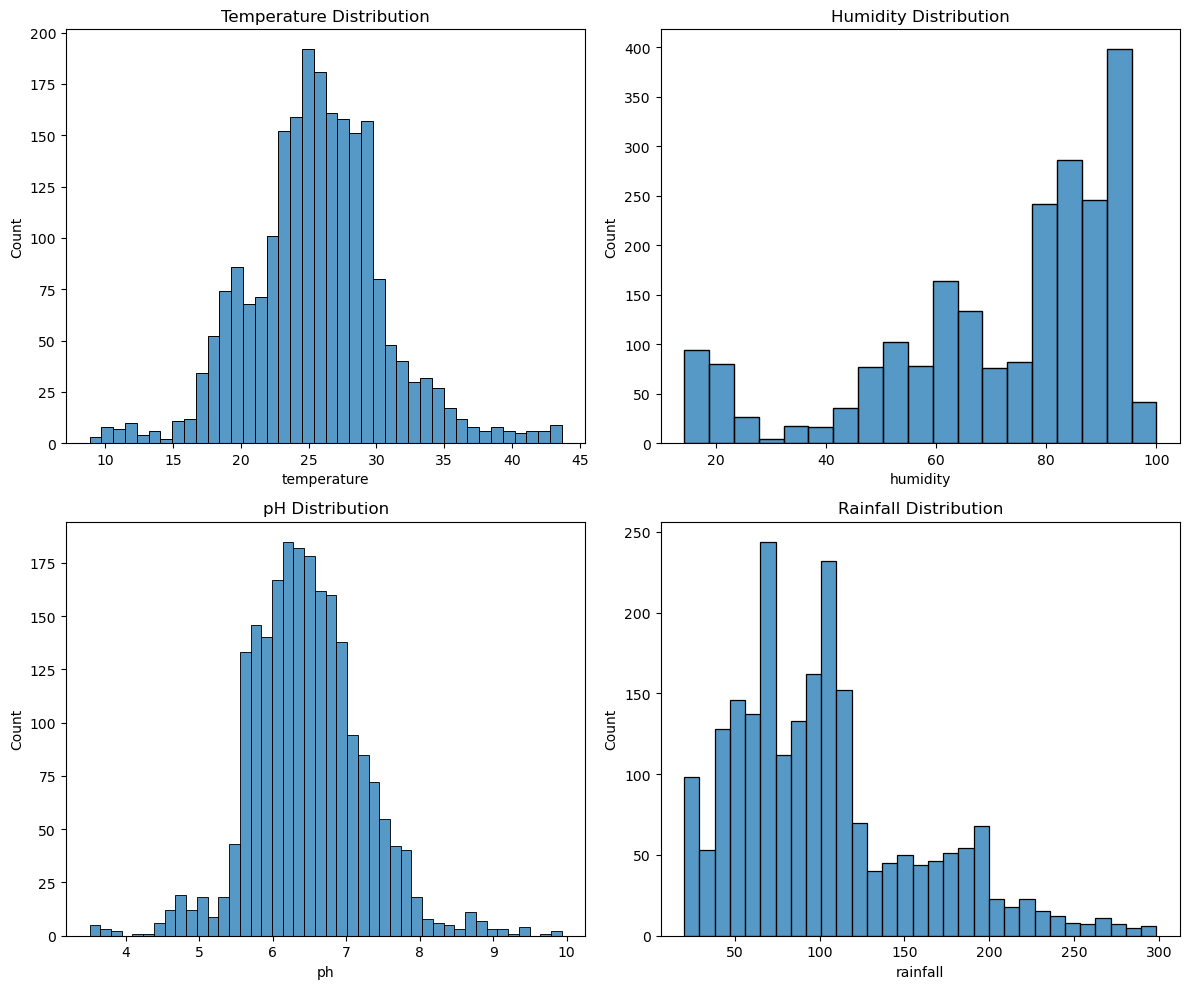

In [23]:
# a=sb.histplot(df['temperature'])
# b=sb.histplot(df['humidity'])
# c=sb.histplot(df['ph'])
# d=sb.histplot(df['rainfall'])
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each histogram in a separate subplot
sb.histplot(df['temperature'], ax=axes[0, 0])
axes[0, 0].set_title("Temperature Distribution")

sb.histplot(df['humidity'], ax=axes[0, 1])
axes[0, 1].set_title("Humidity Distribution")

sb.histplot(df['ph'], ax=axes[1, 0])
axes[1, 0].set_title("pH Distribution")

sb.histplot(df['rainfall'], ax=axes[1, 1])
axes[1, 1].set_title("Rainfall Distribution")

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [27]:
LE = LabelEncoder()
df['target'] = LE.fit_transform(df['label'])

# Define features and target
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['target']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [31]:
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors=5 is common, but can be tuned
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=LE.classes_)

In [35]:
accuracy, classification_rep

(0.9772727272727273,
 '              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        18\n      banana       1.00      1.00      1.00        18\n   blackgram       1.00      1.00      1.00        22\n    chickpea       1.00      1.00      1.00        23\n     coconut       1.00      1.00      1.00        15\n      coffee       1.00      1.00      1.00        17\n      cotton       1.00      0.94      0.97        16\n      grapes       1.00      1.00      1.00        18\n        jute       0.79      0.90      0.84        21\n kidneybeans       0.91      1.00      0.95        20\n      lentil       1.00      1.00      1.00        17\n       maize       0.95      1.00      0.97        18\n       mango       1.00      1.00      1.00        21\n   mothbeans       1.00      1.00      1.00        25\n    mungbean       1.00      1.00      1.00        17\n   muskmelon       1.00      1.00      1.00        23\n      orange       1.00      1.00      1

In [37]:
sample_input = [[90, 42, 43, 20.87, 82.002, 6.5, 202]]

# Predict the crop type
predicted_class = knn.predict(sample_input)

# Decode the predicted class back to the original label
predicted_crop = LE.inverse_transform(predicted_class)

print("Predicted Crop:", predicted_crop[0])

Predicted Crop: rice


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

0.9772727272727273

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode target variable if not done
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Split data and standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Reduce data to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_scaled)
X_test_2D = pca.transform(X_test_scaled)

# Train KNN on the reduced 2D dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2D, y_train)

# Visualize the decision boundary
x_set, y_set = X_test_2D, y_test
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.3, cmap=ListedColormap(('salmon', 'dodgerblue', 'lightgreen', 'orange')))

# Plot test points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('salmon', 'dodgerblue', 'lightgreen', 'orange'))(i), label=label_encoder.inverse_transform([j])[0])

plt.title('KNN Classifier Decision Boundary (Test set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

# Select two features for visualization, for example, 'temperature' and 'humidity'
X_vis = X[['temperature', 'humidity']]
y_vis = y

# Scale the selected features
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Split the data for training and testing visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_vis, test_size=0.2, random_state=0)

# Fit KNN on the two selected features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_vis_scaled[:, 0].min() - 1, stop=X_vis_scaled[:, 0].max() + 1, step=0.01),
    np.arange(start=X_vis_scaled[:, 1].min() - 1, stop=X_vis_scaled[:, 1].max() + 1, step=0.01)
)

plt.contourf(X1, X2, knn_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue', 'lime', 'purple')))

# Plot the test points
for i, j in enumerate(np.unique(y_test_vis)):
    plt.scatter(X_test_vis[y_test_vis == j, 0], X_test_vis[y_test_vis == j, 1],
                c=ListedColormap(('salmon', 'dodgerblue', 'lime', 'purple'))(i), label=label_encoder.inverse_transform([j])[0])

plt.title('KNN Classifier (Test set)')
plt.xlabel('Temperature (scaled)')
plt.ylabel('Humidity (scaled)')
plt.legend()
plt.show()


In [45]:
import pickle

# Assuming 'model' is your trained model
with open("model.pkl", "wb") as f:
    pickle.dump(knn, f)


In [47]:
import pickle

# Assuming 'model' is your trained model
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(LE, f)
